<a href="https://colab.research.google.com/github/IsokGta7/IsokGta7.github.io/blob/main/Notebooks/03-Pr%C3%A1ctica_Guthenberg_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Práctica en clase</h1>

<h2>Topic Modelling</h2>

En esta práctica descubriremos los tópicos presentes en libros. Usaremos un [dataset](https://www.kaggle.com/datasets/mateibejan/15000-gutenberg-books) del proyecto Gutenberg.

La práctica se divide en dos partes:

1. Trabajo en paraja en clase: Se entrega hoy. El objetivo es determinar el tópico de un libro aleatorio usando limpieza de texto, preprocesamiento y nubes de palabras.
2. Presentación en clase: Se presenta mañana. Aplicar las técnicas que mejor te funcionaron a nuevos documentos aleatorios y determinar sus tópicos. En la presentación describir las técnicas usadas, mostrar las nubes de palabras y comparar con los tópicos *reales*.



1. Bajar el dataset de Google Drive

In [1]:
!gdown 1Pm0W_mXtH7AcHJAE1O6_39oaOQj4fUhK

Downloading...
From (original): https://drive.google.com/uc?id=1Pm0W_mXtH7AcHJAE1O6_39oaOQj4fUhK
From (redirected): https://drive.google.com/uc?id=1Pm0W_mXtH7AcHJAE1O6_39oaOQj4fUhK&confirm=t&uuid=b3ec1599-493c-4694-bc6f-800a3c4dcf93
To: /content/gutenberg_data_1000_simple.csv
100% 468M/468M [00:07<00:00, 64.2MB/s]


2. Instalar el módulo wordcloud

In [2]:
!pip install -qq wordcloud

3. Leer el dataset

In [3]:
import pandas as pd

data_df = pd.read_csv('/content/gutenberg_data_1000_simple.csv',index_col=0)

4. Leer un documento aleatorio

In [21]:
import numpy as np

idx = np.random.choice(data_df.index.to_list(),size=1)
text = data_df.loc[idx]['Text'].values[0]

In [22]:
print(text)

GREEK STUDIES: A SERIES OF ESSAYS By WALTER HORATIO PATER E-text Editor: Alfred J. Drake, Ph.D. Electronic Version 1.0 / Date 10-17-01 DISCLAIMER OF DAMAGES [1] I DISCLAIM ALL LIABILITY TO YOU FOR DAMAGES, COSTS AND EXPENSES, INCLUDING LEGAL FEES, AND [2] YOU HAVE NO REMEDIES FOR NEGLIGENCE OR UNDER STRICT LIABILITY, OR FOR BREACH OF WARRANTY OR CONTRACT, INCLUDING BUT NOT LIMITED TO INDIRECT, CONSEQUENTIAL, PUNITIVE OR INCIDENTAL DAMAGES, EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH DAMAGES. THE E-TEXTS ON THIS SITE ARE PROVIDED TO YOU "AS-IS". NO WARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, ARE MADE TO YOU AS TO THE E-TEXTS OR ANY MEDIUM THEY MAY BE ON, INCLUDING BUT NOT LIMITED TO WARRANTIES OF MERCHANTABILITY OR FITNESS FOR A PARTICULAR PURPOSE. Some states do not allow disclaimers of implied warranties or the exclusion or limitation of consequential damages, so the above disclaimers and exclusions may not apply to you, and you may have other legal rights. GREEK STUDIES: A SER

Longitud aproximada de palabras

In [23]:
len(text.split())

73040

# 1. Trabajo en clase

0. Guarda el texto con el que vas a trabajar en un archivo para que puedas seguir trabajando con el mismo texto durante todo este trabajo.
1. Generar una nube de palabras con el texto crudo.
2. Tokenizar el texto con spacy, quitar stopwords y signos de puntuación, generar una nube de palabras con este texto limpio.
3. Adicionalmente, lematizar el texto y generar otra nube de palabras.

Usando las nubes de palabras, ¿puedes determinar el tema/tópico del libro?

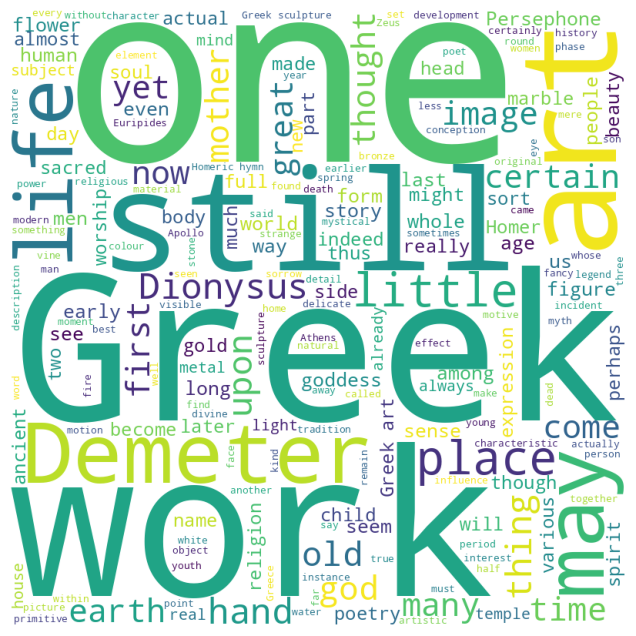

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
#Importamos las librerias necesarias
import re
import spacy

#Cargamos el modelo
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    #Quitamos Citas
    text = re.sub(r'\[\d+\]', '', text)

    #Quitamos vacios
    text = re.sub(r'\n', ' ', text)

    #Quitamos parentesis y comillas
    text = re.sub(r'\".*?\"', '', text)
    text = re.sub(r'\(.*?\)', '', text)

    #Quitamos puntuacion
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = text.lower()
    text = text.replace('\n', ' ')

    return text

def process_with_spacy(text):
    #Tokenizamos
    doc = nlp(text)

    #Lematizamos y filtramos puntuacion
    tokens = [token.lemma_.lower() for token in doc if not token.is_punct]

    #Re pegamos tokens
    return ' '.join(tokens)


print("Original:")
print(text)
print("\n" + "="*80 + "\n")

#Limpio
cleaned_text = clean_text(text)
print("Limpio sin tokenizar:")
print(cleaned_text)
print("\n" + "="*80 + "\n")

#Spacy
spacy_processed = process_with_spacy(cleaned_text)
print("Spacy:")
print(spacy_processed)
print("\n" + "="*80 + "\n")


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Original:
GREEK STUDIES: A SERIES OF ESSAYS By WALTER HORATIO PATER E-text Editor: Alfred J. Drake, Ph.D. Electronic Version 1.0 / Date 10-17-01 DISCLAIMER OF DAMAGES [1] I DISCLAIM ALL LIABILITY TO YOU FOR DAMAGES, COSTS AND EXPENSES, INCLUDING LEGAL FEES, AND [2] YOU HAVE NO REMEDIES FOR NEGLIGENCE OR UNDER STRICT LIABILITY, OR FOR BREACH OF WARRANTY OR CONTRACT, INCLUDING BUT NOT LIMITED TO INDIRECT, CONSEQUENTIAL, PUNITIVE OR INCIDENTAL DAMAGES, EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH DAMAGES. THE E-TEXTS ON THIS SITE ARE PROVIDED TO YOU "AS-IS". NO WARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, ARE MADE TO YOU AS TO THE E-TEXTS OR ANY MEDIUM THEY MAY BE ON, INCLUDING BUT NOT LIMITED TO WARRANTIES OF MERCHANTABILITY OR FITNESS FOR A PARTICULAR PURPOSE. Some states do not allow disclaimers of implied warranties or the exclusion or limitation of consequential damages, so the above disclaimers and exclusions may not apply to you, and you may have other legal rights. GREEK STUD

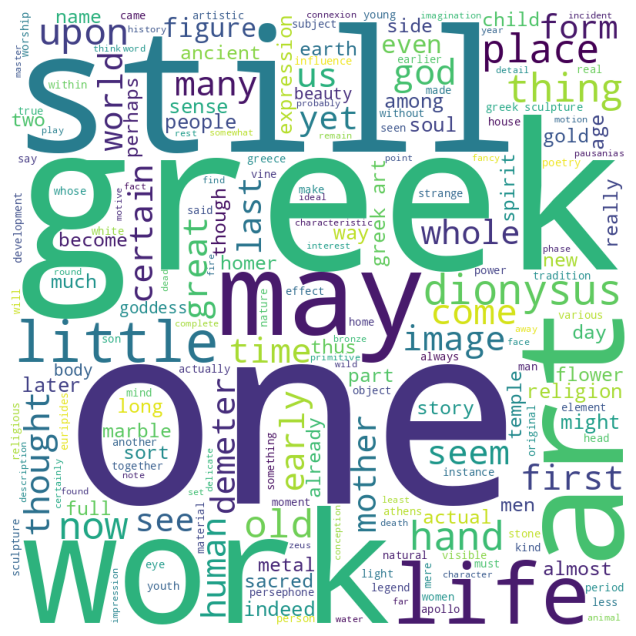

In [28]:
wordcloudLimpio = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(cleaned_text)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloudLimpio)
plt.axis("off")
plt.show()

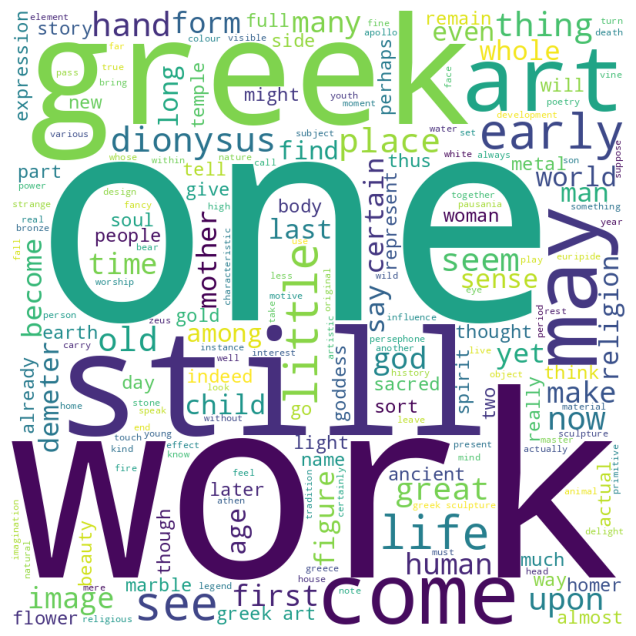

In [29]:
wordcloudSpicey = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(spacy_processed)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloudSpicey)
plt.axis("off")
plt.show()

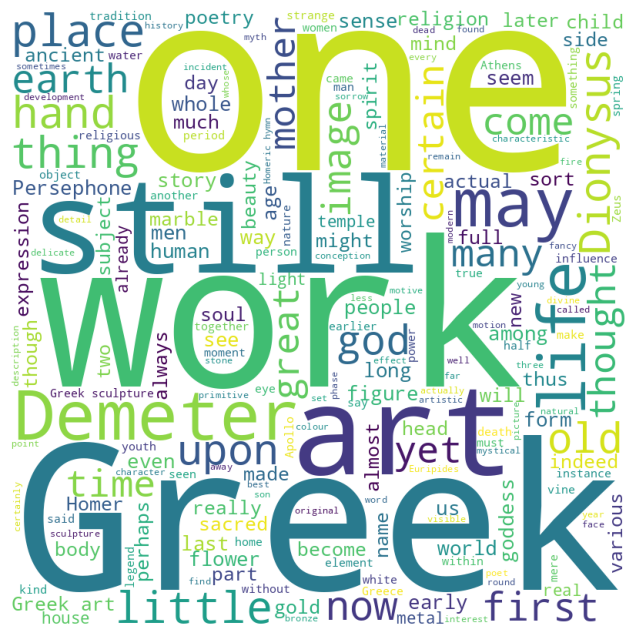

In [33]:
wordcloudCrud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloudCrud)
plt.axis("off")
plt.show()

#2. Trabajo adicional para presentación

Con el mismo texto que trabajaron en clase prueben estrategias de preprocesamiento adicionales y discutan si producen mejores resultados.

* Eliminar stopwords, puntuaciones y símbolos. Lematizar el texto. Hacer la nube de palabras.
* Eliminar stopwords, puntuaciones y símbolos. Quedarse solamente con los adjetivos. Hacer la nube de palabras.
* Eliminar stopwords, puntuaciones y símbolos. Quedarse solamente con los sustantivos. Hacer la nube de palabras.
* Eliminar stopwords, puntuaciones y símbolos. Quedarse solamente con los verbos. Hacer la nube de palabras.
* **Estrategia libre**. Hacer la nube de palabras.

Al final, elegir una de estas estrategias (estas 5 y las de la práctica en clase). Recuerda que el objetivo es que la nube de palabras correspondiente te ayude a identificar el tópico del documento.




Ahora, consideraremos 5 documentos adicionales aleatorios.

In [ ]:
idxs = np.random.choice(data_df.index.to_list(),size=5)
print(idxs)
texts = list(data_df.loc[idx]['Text'].values)

[ 66 816  28 311 290]


0. Imprime los índices de los textos con los que trabajaste.
1. Aplica la estrategia que tú consideras que dió mejores resultados en el texto anterior a cada uno de estos 5 textos y genera una nube de palabras con cada uno de los textos.
2. Determina, el tópico de cada documento.
3. En clase, presentarán las nubes de palabras (una por cada uno de estos 5 nuevos documentos) y mencionarán brevemente la estrategia de preprocesamiento usada. La presentación será muy breve, máximo 3 minutos.